# Projeto Machine Learning

[Explicação do projeto]

[Motivação]

[Índice]

*Sumario*<br/><br/>1 - [Importando Libs](#1---Importando-Libs)<br/>2 - [Apagando os avisos do notebook](#2---Apagando-os-avisos-do-notebook)<br/>3 - [Carregando Dataset](#3---Carregando-Dataset)<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1 - [Estilo Popular (nº 0)](#3.1---Estilo-Popular-(nº-0))<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2 - [Estilo Classico (nº 1)](#3.2---Estilo-Classico-(nº-1))<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3 - [Estilo Jazz (nº 2)](#3.3---Estilo-Jazz-(nº-2))<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4 - [Estilo Rock (nº 3)](#3.4---Estilo-Rock-(nº-3))

# 1 - Importando Libs

In [138]:
# Libs matplotlib, numpy and pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lib librosa
import librosa
import librosa.display

# Lib OS
from os import listdir
from os.path import isfile, join, exists

# Lib ipwidgets
from ipywidgets import interact, IntSlider, interact_manual
import ipywidgets as widgets



# Lib IPtyhon Display
import IPython.display as ipd

# Lib glob
import glob

# Lib sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split

# Lib keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

# 2 - Apagando os avisos do notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 3 - Carregando Dataset

Baixar todo o [dataset](https://www.kaggle.com/carlthome/gtzan-genre-collection) (genre/) e colocar na mesma pasta do projeto.

In [3]:
def import_signal(path):
    
    # Test if path exists
    if( exists(path) == False ):
        print("Path does not exist, download from https://www.kaggle.com/carlthome/gtzan-genre-collection")
        return 0, 0
    
    # Load files woth glob
    files = glob.glob(path + '*.au')
    audios = []
    
    # Load audio files with sample rate 22050 Hz
    for file in files: 
        s, sr = librosa.core.load(file, sr=22050)
        audios.append(s)
        
    # Return audio vector and sample rate
    return audios, sr

Iremos considerar os seguintes rótulos para cada estilo:

    * Popular  =>  y=0 e y2=0
    * Clássico =>  y=1 e y2=0
    * Jazz     =>  y=2 e y2=1
    * Rock     =>  y=3 e y2=1
    
Isso porque y equivale ao rótulo do primeiro cenário, no qual temos apenas uma SVM e 4 possíveis saídas. Já y2 é usado no segundo cenário nas primeiras SVMs, as quais são utilizadas para separar os estilos popular e clássico dos estilos jazz e rock.

## 3.1 - Estilo Popular (nº 0)

In [4]:
# Import Popular audio files
pop_audios, pop_sr = import_signal('genres/pop/')

pop_audios_df = pd.DataFrame([[x] for x in pop_audios], columns=['x'])
pop_audios_df['y'] = 0
pop_audios_df['y2'] = 0
pop_audios_df.head(2)

x  y  y2
0  [-0.0340271, -0.043304443, -0.0463562, -0.0431...  0   0
1  [-0.058288574, 0.01071167, 0.09915161, 0.07913...  0   0

In [5]:
# Por algum motivo o interact não funciona com o ipd.Audio

# @interact(x=IntSlider(min=0, max=99, step=1, value=0))
# def _f(x):
#     ipd.Audio(pop_audios[x], rate=pop_sr)
    
x = 23
ipd.Audio(pop_audios[x], rate=pop_sr)

## 3.2 - Estilo Clássico (nº 1)

In [6]:
# Import Classical audio files
classical_audios, classical_sr = import_signal('genres/classical/')

classical_audios_df = pd.DataFrame([[x] for x in classical_audios], columns=['x'])
classical_audios_df['y'] = 1
classical_audios_df['y2'] = 0
classical_audios_df.head(2)

x  y  y2
0  [-0.06484985, -0.10720825, -0.109436035, -0.09...  1   0
1  [0.007537842, 0.011444092, 0.010345459, 0.0132...  1   0

In [7]:
# Por algum motivo o interact não funciona com o ipd.Audio

# @interact(x=IntSlider(min=0, max=99, step=1, value=0))
# def _f(x):
#     ipd.Audio(classical_audios[x], rate=classical_sr)
    
x = 24
ipd.Audio(classical_audios[x], rate=classical_sr)

## 3.3 - Estilo Jazz (nº 2)

In [8]:
# Import Jazz audio files
jazz_audios, jazz_sr = import_signal('genres/jazz/')

jazz_audios_df = pd.DataFrame([[x] for x in jazz_audios], columns=['x'])
jazz_audios_df['y'] = 2
jazz_audios_df['y2'] = 1
jazz_audios_df.head(2)

x  y  y2
0  [-0.031066895, -0.05078125, -0.04537964, -0.04...  2   1
1  [0.0019836426, 0.0014343262, -0.0017089844, -0...  2   1

In [9]:
# Por algum motivo o interact não funciona com o ipd.Audio

# @interact(x=IntSlider(min=0, max=99, step=1, value=0))
# def _f(x):
#     ipd.Audio(jazz_audios[x], rate=jazz_sr)
    
x = 35
ipd.Audio(jazz_audios[x], rate=jazz_sr)

## 3.4 - Estilo Rock (nº 3)

In [10]:
# Import Rock audio files
rock_audios, rock_sr = import_signal('genres/rock/')

rock_audios_df = pd.DataFrame([[x] for x in rock_audios], columns=['x'])
rock_audios_df['y'] = 3
rock_audios_df['y2'] = 1
rock_audios_df.head(2)

x  y  y2
0  [0.035339355, 0.053375244, -0.0047912598, 0.00...  3   1
1  [-0.07858276, -0.1638794, -0.11288452, 0.00088...  3   1

In [11]:
# Por algum motivo o interact não funciona com o ipd.Audio

# @interact(x=IntSlider(min=0, max=99, step=1, value=0))
# def _f(x):
#     ipd.Audio(rock_audios[x], rate=rock_sr)
    
x = 3
ipd.Audio(rock_audios[x], rate=rock_sr)

## Verificando os Sample Rates

In [12]:
pop_sr == classical_sr == jazz_sr == rock_sr

True

In [13]:
sr = pop_sr
sr

22050

## Criando o data frame de audios

In [14]:
audios = (
    pd.concat([ pop_audios_df, 
                classical_audios_df, 
                jazz_audios_df, 
                rock_audios_df])
    .sample(frac=1) #shuffle
    .reset_index(drop=True) 
)

print(f'Rows: {len(audios)}')
audios.head(2)

Rows: 400


x  y  y2
0  [-0.15530396, -0.21246338, -0.08627319, -0.020...  2   1
1  [-0.030426025, -0.022003174, -0.023590088, -0....  1   0

## Dividindo entre  Treinamento e Teste

In [58]:
msk = np.random.rand(len(audios)) < 0.8
train = audios[msk]
test = audios[~msk]

print(f'Rows train:{len(train)}')
print(f'Rows test:{len(test)}')

Rows train:316
Rows test:84


### Verificando a distribuição de treinamento e teste entre os estilos musicais

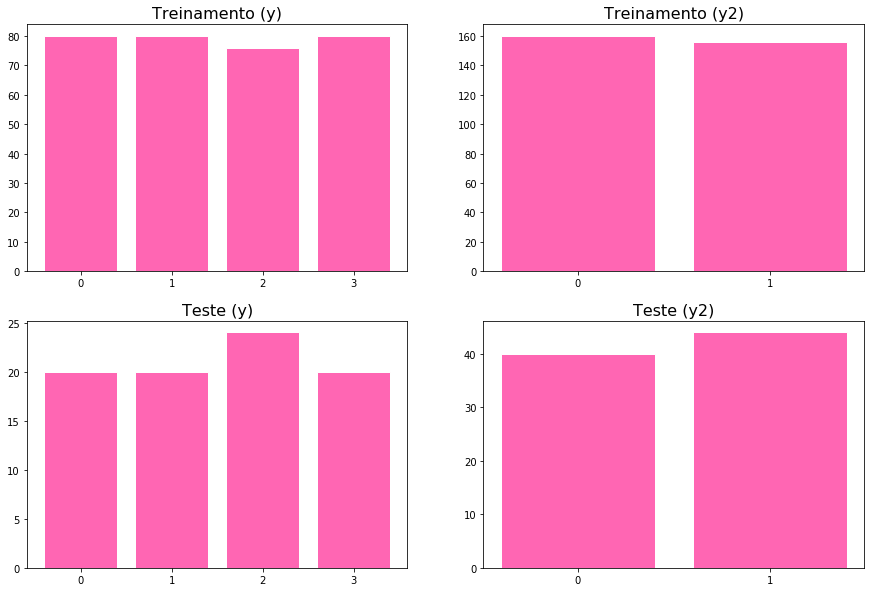

In [59]:
bins_y = np.sort(train['y'].unique())
bins_y2 = np.sort(train['y2'].unique())

fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0, 0].bar(bins_y, np.histogram(train['y'], bins=len(bins_y))[0], 
              align='center', color='#ff66b3', ec='#ffffff')
axs[0, 0].set_xticks(bins_y)
axs[0, 0].set_title('Treinamento (y)', fontsize=16)

axs[0, 1].bar(bins_y2, np.histogram(train['y2'], bins=len(bins_y2))[0], 
              align='center', color='#ff66b3', ec='#ffffff')
axs[0, 1].set_xticks(bins_y2)
axs[0, 1].set_title('Treinamento (y2)', fontsize=16)

axs[1, 0].bar(bins_y, np.histogram(test['y'], bins=len(bins_y))[0], 
              align='center', color='#ff66b3', ec='#ffffff')
axs[1, 0].set_xticks(bins_y)
axs[1, 0].set_title('Teste (y)', fontsize=16)

axs[1, 1].bar(bins_y2, np.histogram(test['y2'], bins=len(bins_y2))[0], 
              align='center', color='#ff66b3', ec='#ffffff')
axs[1, 1].set_xticks(bins_y2)
axs[1, 1].set_title('Teste (y2)', fontsize=16)

plt.show()

In [18]:
# print("Train count Y axis:")
# print(train.groupby('y').count())
# print(" ")
# print("Train count Y2 axis:")
# print(train.groupby('y2').count())
# print(" ")
# print("Test count Y axis:")
# print(test.groupby('y').count())
# print(" ")
# print("Test count Y2 axis:")
# print(test.groupby('y2').count())

## Extração de Features

### MFCC (flatten)

In [102]:
# Train
mfcc_list_train = []

for x in train['x']:
    mfcc = np.array(librosa.feature.mfcc(y=x, sr=sr))
    mfcc_flatten = mfcc.flatten()
    zeros = np.zeros((26280 - len(mfcc_flatten))) # fazemos isso pois, para cada x temos diferentes
                                                  # tamanhos de mfcc - sendo o maximo=26280
    mfcc_list_train.append(np.concatenate((mfcc_flatten, zeros), axis=0))

train['mfcc'] = mfcc_list_train


# Test
mfcc_list_test = []

for x in test['x']:
    mfcc = np.array(librosa.feature.mfcc(y=x, sr=sr))
    mfcc_flatten = mfcc.flatten()
    zeros = np.zeros((26280 - len(mfcc_flatten)))
    mfcc_list_test.append(np.concatenate((mfcc_flatten, zeros), axis=0))

test['mfcc'] = mfcc_list_test


# Results
train.head()
test.head()

x  y  y2  \
15  [-0.2119751, -0.0675354, -0.18411255, 0.024597...  0   0   
17  [-0.054382324, -0.07556152, -0.12057495, -0.14...  3   1   
19  [-0.21136475, -0.39596558, -0.3473816, -0.3186...  3   1   
29  [0.007080078, 0.0119018555, 0.012329102, 0.014...  1   0   
39  [0.0049743652, -0.0015258789, -0.009124756, -0...  3   1   

                                                 mfcc  
15  [-15.670974731445312, -28.857818603515625, -61...  
17  [-62.51100540161133, -69.08077239990234, -72.6...  
19  [-181.32757568359375, -191.0098876953125, -224...  
29  [-377.37750244140625, -388.97589111328125, -40...  
39  [-141.84959411621094, -47.134639739990234, 0.1...

### Mel Spectogram (flatten)

In [103]:
# Train
mel_spect_list_train = []

for x in train['x']:
    mel_spect = np.array(librosa.feature.melspectrogram(y=x, sr=sr))
    mel_spect_flatten = mel_spect.flatten()
    zeros = np.zeros((168192 - len(mel_spect_flatten))) # fazemos isso pois, para cada x temos diferentes
                                                  # tamanhos de mel_sepc - sendo o maximo=168192
    mel_spect_list_train.append(np.concatenate((mel_spect_flatten, zeros), axis=0))

train['mel_spect'] = mel_spect_list_train


# Test
mel_spect_list_test = []

for x in test['x']:
    mel_spect = np.array(librosa.feature.melspectrogram(y=x, sr=sr))
    mel_spect_flatten = mel_spect.flatten()
    zeros = np.zeros((168192 - len(mel_spect_flatten)))
    mel_spect_list_test.append(np.concatenate((mel_spect_flatten, zeros), axis=0))

test['mel_spect'] = mel_spect_list_test


# Results
train.head()
test.head()

x  y  y2  \
15  [-0.2119751, -0.0675354, -0.18411255, 0.024597...  0   0   
17  [-0.054382324, -0.07556152, -0.12057495, -0.14...  3   1   
19  [-0.21136475, -0.39596558, -0.3473816, -0.3186...  3   1   
29  [0.007080078, 0.0119018555, 0.012329102, 0.014...  1   0   
39  [0.0049743652, -0.0015258789, -0.009124756, -0...  3   1   

                                                 mfcc  \
15  [-15.670974731445312, -28.857818603515625, -61...   
17  [-62.51100540161133, -69.08077239990234, -72.6...   
19  [-181.32757568359375, -191.0098876953125, -224...   
29  [-377.37750244140625, -388.97589111328125, -40...   
39  [-141.84959411621094, -47.134639739990234, 0.1...   

                                            mel_spect  
15  [24.468599319458008, 27.353303909301758, 11.70...  
17  [0.021257610991597176, 0.07612776011228561, 0....  
19  [68.89766693115234, 29.803237915039062, 5.5437...  
29  [0.021097417920827866, 0.017338905483484268, 0...  
39  [0.5650583505630493, 0.2698820233345032, 0.077...

### LPC

In [104]:
# Train
lpc_list = []
for x in train['x']:
    lpc = librosa.lpc(x, 6)
    lpc_list.append(lpc)
train['lpc'] = lpc_list

# Test
lpc_list = []
for x in test['x']:
    lpc = librosa.lpc(x, 6)
    lpc_list.append(lpc)    
test['lpc'] = lpc_list

# Results
test.head()
train.head()

x  y  y2  \
0  [-0.15530396, -0.21246338, -0.08627319, -0.020...  2   1   
1  [-0.030426025, -0.022003174, -0.023590088, -0....  1   0   
2  [-0.0051879883, -0.007232666, -0.0024719238, 0...  1   0   
3  [0.018096924, -0.008270264, 0.027191162, 0.050...  0   0   
4  [-0.09463501, -0.11407471, -0.13574219, -0.164...  0   0   

                                                mfcc  \
0  [-160.3988494873047, -197.64544677734375, -273...   
1  [-141.89842224121094, -137.3188018798828, -125...   
2  [-230.6083526611328, -250.8761444091797, -273....   
3  [-132.46429443359375, -119.04566192626953, -11...   
4  [-62.3121452331543, -59.014347076416016, -59.9...   

                                           mel_spect  \
0  [0.02083946019411087, 0.010240345261991024, 0....   
1  [0.06231164559721947, 0.018382510170340538, 0....   
2  [0.13976556062698364, 0.11157052218914032, 0.1...   
3  [0.13715174794197083, 0.1591791808605194, 0.08...   
4  [93.40006256103516, 93.13259887695312, 109.229...   

                                                 lpc  
0  [1.0, -2.7020729, 3.3204522, -2.546664, 1.4515...  
1  [1.0, -1.8108615, 1.2143768, -0.3361434, 0.032...  
2  [1.0, -2.5331054, 2.9784825, -2.5286088, 1.888...  
3  [1.0, -0.85659486, -0.04352522, 0.058529224, -...  
4  [1.0, -0.42462036, -0.4754477, 0.061983056, 0....

### MFCC + LPC

In [105]:
# Train
train['mfcc_lpc'] = (
    train['mfcc'].apply(lambda x: x.tolist())
    + train['lpc'].apply(lambda x: x.tolist())
)

# Test
test['mfcc_lpc'] = (
    test['mfcc'].apply(lambda x: x.tolist())
    + test['lpc'].apply(lambda x: x.tolist())
)

# Results
test.head()
train.head()

x  y  y2  \
0  [-0.15530396, -0.21246338, -0.08627319, -0.020...  2   1   
1  [-0.030426025, -0.022003174, -0.023590088, -0....  1   0   
2  [-0.0051879883, -0.007232666, -0.0024719238, 0...  1   0   
3  [0.018096924, -0.008270264, 0.027191162, 0.050...  0   0   
4  [-0.09463501, -0.11407471, -0.13574219, -0.164...  0   0   

                                                mfcc  \
0  [-160.3988494873047, -197.64544677734375, -273...   
1  [-141.89842224121094, -137.3188018798828, -125...   
2  [-230.6083526611328, -250.8761444091797, -273....   
3  [-132.46429443359375, -119.04566192626953, -11...   
4  [-62.3121452331543, -59.014347076416016, -59.9...   

                                           mel_spect  \
0  [0.02083946019411087, 0.010240345261991024, 0....   
1  [0.06231164559721947, 0.018382510170340538, 0....   
2  [0.13976556062698364, 0.11157052218914032, 0.1...   
3  [0.13715174794197083, 0.1591791808605194, 0.08...   
4  [93.40006256103516, 93.13259887695312, 109.229...   

                                                 lpc  \
0  [1.0, -2.7020729, 3.3204522, -2.546664, 1.4515...   
1  [1.0, -1.8108615, 1.2143768, -0.3361434, 0.032...   
2  [1.0, -2.5331054, 2.9784825, -2.5286088, 1.888...   
3  [1.0, -0.85659486, -0.04352522, 0.058529224, -...   
4  [1.0, -0.42462036, -0.4754477, 0.061983056, 0....   

                                            mfcc_lpc  
0  [-160.3988494873047, -197.64544677734375, -273...  
1  [-141.89842224121094, -137.3188018798828, -125...  
2  [-230.6083526611328, -250.8761444091797, -273....  
3  [-132.46429443359375, -119.04566192626953, -11...  
4  [-62.3121452331543, -59.014347076416016, -59.9...

### Mel spectrogram + LPC

In [106]:
# Train
train['mel_spect_lpc'] = (
    train['mel_spect'].apply(lambda x: x.tolist())
    + train['lpc'].apply(lambda x: x.tolist())
)

# Test
test['mel_spect_lpc'] = (
    test['mel_spect'].apply(lambda x: x.tolist())
    + test['lpc'].apply(lambda x: x.tolist())
)

# Results
test.head()
train.head()

x  y  y2  \
0  [-0.15530396, -0.21246338, -0.08627319, -0.020...  2   1   
1  [-0.030426025, -0.022003174, -0.023590088, -0....  1   0   
2  [-0.0051879883, -0.007232666, -0.0024719238, 0...  1   0   
3  [0.018096924, -0.008270264, 0.027191162, 0.050...  0   0   
4  [-0.09463501, -0.11407471, -0.13574219, -0.164...  0   0   

                                                mfcc  \
0  [-160.3988494873047, -197.64544677734375, -273...   
1  [-141.89842224121094, -137.3188018798828, -125...   
2  [-230.6083526611328, -250.8761444091797, -273....   
3  [-132.46429443359375, -119.04566192626953, -11...   
4  [-62.3121452331543, -59.014347076416016, -59.9...   

                                           mel_spect  \
0  [0.02083946019411087, 0.010240345261991024, 0....   
1  [0.06231164559721947, 0.018382510170340538, 0....   
2  [0.13976556062698364, 0.11157052218914032, 0.1...   
3  [0.13715174794197083, 0.1591791808605194, 0.08...   
4  [93.40006256103516, 93.13259887695312, 109.229...   

                                                 lpc  \
0  [1.0, -2.7020729, 3.3204522, -2.546664, 1.4515...   
1  [1.0, -1.8108615, 1.2143768, -0.3361434, 0.032...   
2  [1.0, -2.5331054, 2.9784825, -2.5286088, 1.888...   
3  [1.0, -0.85659486, -0.04352522, 0.058529224, -...   
4  [1.0, -0.42462036, -0.4754477, 0.061983056, 0....   

                                            mfcc_lpc  \
0  [-160.3988494873047, -197.64544677734375, -273...   
1  [-141.89842224121094, -137.3188018798828, -125...   
2  [-230.6083526611328, -250.8761444091797, -273....   
3  [-132.46429443359375, -119.04566192626953, -11...   
4  [-62.3121452331543, -59.014347076416016, -59.9...   

                                       mel_spect_lpc  
0  [0.02083946019411087, 0.010240345261991024, 0....  
1  [0.06231164559721947, 0.018382510170340538, 0....  
2  [0.13976556062698364, 0.11157052218914032, 0.1...  
3  [0.13715174794197083, 0.1591791808605194, 0.08...  
4  [93.40006256103516, 93.13259887695312, 109.229...

## Cenário I

* Usando uma rede SVM de apenas uma cama para reconhecer os 4 tipos musicais

In [112]:
def first_scenario_classification(train, test, feature_ex='lpc', feature_ex2='mfcc_lpc', 
                                  two_features_ex=False, return_model=False):
    
    model = svm.SVC()
    
    if two_features_ex:
        
        model.fit(train[f'{feature_ex2}'].to_list(), train['y'].to_list())

        train_score = (
            model.score(train[f'{feature_ex2}'].to_list(), train['y'].to_list())
        )

        test_score = (
            model.score(test[f'{feature_ex2}'].to_list(), test['y'].to_list())
        )
        
    else:
        model.fit(train[f'{feature_ex}'].to_list(), train['y'].to_list())

        train_score = (
            model.score(train[f'{feature_ex}'].to_list(), train['y'].to_list())
        )

        test_score = (
            model.score(test[f'{feature_ex}'].to_list(), test['y'].to_list())
        )

    print('Train accuracy: {:.1%}'.format(train_score))
    print('Test accuracy: {:.1%}'.format(test_score))
    
    if return_model:
         return model    

### MFCC

Descrição da feature

In [108]:
first_scenario_classification(train, test, feature_ex='mfcc')

Train accuracy: 100.0%
Test accuracy: 45.2%


### Mel spectogram

Descrição da feature

In [110]:
first_scenario_classification(train, test, feature_ex='mel_spect')

Train accuracy: 100.0%
Test accuracy: 38.1%


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### LPC

Descrição da feature

In [28]:
first_scenario_classification(train, test, feature_ex='lpc')

Train accuracy: 70.5%
Test accuracy: 70.4%


True

### MFCC & LPC

Descrição da junção das duas

In [29]:
first_scenario_classification(train, test, feature_ex2='mfcc_lpc', two_features_ex=True)

Train accuracy: 100.0%
Test accuracy: 23.9%


True

### Mel spectogram & LPC

Descrição da junção das duas

In [47]:
first_scenario_classification(train, test, feature_ex2='mel_spect_lpc', two_features_ex=True)

Train accuracy: 100.0%
Test accuracy: 39.4%


True

### Conclusão

RASCUNHO:

Percebemos que entre todas as tentativas acima o LPC foi o que teve melhor resultado.

### Tentativa de predição com o melhor modelo - INCOMPLETO

In [170]:
def widgets_int_slider(audio_number):
    return audio_number.value

w = widgets.IntSlider(
    value=0,
    min=0,
    max=99,
    step=1,
    description='Audio:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
audio_number = widgets.interactive_output(widgets_int_slider, {'audio_number': w})
widgets.HBox([widgets.VBox([w])])

In [ ]:
selected_audio_number = []

def create_int_slider():
    number_object = widgets.IntSlider(value=0, min=0, max=99, step=1,
                                      description='Audio:', disabled=False,
                                      continuous_update=False, orientation='horizontal',
                                      readout=True, readout_format='d')

    ui = widgets.HBox([widgets.VBox([w])])


    def select_data(**kwargs):
        selected_data.clear()

        for key in kwargs:
            if kwargs[key] is True:
                selected_data.append(number_object)

        print(selected_data)

    out = widgets.interactive_output(select_data, number_object)
#     display(ui)
#     return out

audio_number = create_int_slider()

In [146]:
widgets.Dropdown(
    options=['popular', 'classica', 'jazz', 'rock'],
    value='popular',
    description='Genero:',
    disabled=False,
)

Dropdown(description='Genero:', options=('popular', 'classica', 'jazz', 'rock'), value='popular')

In [137]:
model = first_scenario_classification(train, test, feature_ex='lpc', return_model=True)

audio_test = pop_audios[15]
audio_test_lpc = librosa.lpc(audio_test, 6)

for predicted in model.predict([audio_test_lpc]):
    
    genre_dict = {0: 'popular', 1:'classica',
                  2:'jazz', 3:'rock'}
    predicted_muscal_genre = genre_dict[predicted]
    
    print(f'\nA música inserida pertence ao estilo musical {predicted_muscal_genre}')

Train accuracy: 69.0%
Test accuracy: 69.0%

A música inserida pertence ao estilo musical popular


## Cenário II

* Usando 3 redes SVM (NECESSITA DESCRIçÃO)

In [31]:
def second_scenario_classification(train, test, feature_ex_svm1='lpc', feature_ex_svm23='mfcc'):
    # SVM1
    model1 = svm.SVC()
    model1.fit(train[f'{feature_ex_svm1}'].to_list(), train['y2'].to_list())
    train['y2_predicted'] = model1.predict(train[f'{feature_ex_svm1}'].to_list())
    
    #SVM2
    train_2 = train[train['y2_predicted']==0]
    train_2 = train_2[train_2['y'].isin([0,1])]
    test_2 = test[test['y2']==0]
    model2 = svm.SVC()
    model2.fit(train_2[f'{feature_ex_svm23}'].to_list(), train_2['y'].to_list())
    
    #SVM3
    train_3 = train[train['y2_predicted']==1]
    train_3 = train_3[train_3['y'].isin([2,3])]
    test_3 = test[test['y2']==1]
    model3 = svm.SVC()
    model3.fit(train_3[f'{feature_ex_svm23}'].to_list(), train_3['y'].to_list())
    
    train_score = (
        model2.score(train_2[f'{feature_ex_svm23}'].to_list(), train_2['y'].to_list()) * 0.5 +
        model3.score(train_3[f'{feature_ex_svm23}'].to_list(), train_3['y'].to_list()) * 0.5
    )
    
    test_score = (
        model2.score(test_2[f'{feature_ex_svm23}'].to_list(), test_2['y'].to_list()) * 0.5 +
        model3.score(test_3[f'{feature_ex_svm23}'].to_list(), test_3['y'].to_list()) * 0.5
    )
    
    print('Train accuracy: {:.1%}'.format(train_score))
    print('Test accuracy: {:.1%}'.format(test_score))

In [32]:
second_scenario_classification(train, test, feature_ex_svm1='lpc', feature_ex_svm23='lpc')

Train accuracy: 90.4%
Test accuracy: 84.3%


In [33]:
second_scenario_classification(train, test, feature_ex_svm1='mfcc', feature_ex_svm23='mfcc')

Train accuracy: 100.0%
Test accuracy: 51.9%


In [34]:
second_scenario_classification(train, test, feature_ex_svm1='mel_spect', feature_ex_svm23='mel_spect')

Train accuracy: 100.0%
Test accuracy: 66.1%


In [35]:
second_scenario_classification(train, test, feature_ex_svm1='lpc', feature_ex_svm23='mfcc')

Train accuracy: 100.0%
Test accuracy: 49.4%


In [37]:
second_scenario_classification(train, test, feature_ex_svm1='mfcc', feature_ex_svm23='lpc')

Train accuracy: 89.1%
Test accuracy: 86.9%


In [36]:
second_scenario_classification(train, test, feature_ex_svm1='lpc', feature_ex_svm23='mel_spect')

Train accuracy: 100.0%
Test accuracy: 61.0%


In [38]:
second_scenario_classification(train, test, feature_ex_svm1='mel_spect', feature_ex_svm23='lpc')

Train accuracy: 89.1%
Test accuracy: 86.9%


In [39]:
second_scenario_classification(train, test, feature_ex_svm1='mfcc', feature_ex_svm23='mel_spect')

Train accuracy: 100.0%
Test accuracy: 66.1%


In [40]:
second_scenario_classification(train, test, feature_ex_svm1='mel_spect', feature_ex_svm23='mfcc')

Train accuracy: 100.0%
Test accuracy: 51.9%


### Conclusão

### Tentativa de predição com o melhor modelo

# Rede neural convolucional

## Adaptando o dataset

In [17]:
train_cnn = train[['x', 'y']]
test_cnn = test[['x', 'y']]

In [79]:
mel_spect.shape

(128, 1293)

In [78]:
# Train
mel_spect_list_train = []

for x in train_cnn['x']:
    mel_spect = np.array(librosa.feature.melspectrogram(y=x, sr=sr))
    mel_spect_list_train.append(np.expand_dims(mel_spect, axis=2))

train_cnn['mel_spect'] = mel_spect_list_train


# Test
mel_spect_list_test = []

for x inmel_specttest_cnn['x']:
    mel_spec = np.array(librosa.feature.melspectrogram(y=x, sr=sr))
    mel_spect_list_test.append(np.expand_dims(mel_spect, axis=2) )

test_cnn['mel_spect'] = mel_spect_list_test


# Results
train_cnn.head()
test_cnn.head()

x  y  \
1  [-0.030426025, -0.022003174, -0.023590088, -0....  1   
2  [-0.0051879883, -0.007232666, -0.0024719238, 0...  1   
5  [-0.11593628, -0.15219116, -0.12042236, -0.111...  1   
8  [-0.049987793, -0.041931152, -0.029937744, -0....  2   
9  [0.022705078, 0.050720215, 0.068847656, 0.0880...  0   

                                           mel_spect  
1  [[[66.72353], [86.1697], [88.799934], [81.1013...  
2  [[[66.72353], [86.1697], [88.799934], [81.1013...  
5  [[[66.72353], [86.1697], [88.799934], [81.1013...  
8  [[[66.72353], [86.1697], [88.799934], [81.1013...  
9  [[[66.72353], [86.1697], [88.799934], [81.1013...

In [42]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(128, 1293, 1)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))
    return model

In [43]:
model = get_model()

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 127, 1292, 32)     160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 1291, 48)     6192      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 125, 1290, 120)    23160     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 645, 120)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 645, 120)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4798800)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [44]:
optimizer = optimizers.SGD(lr=0.002, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [98]:
train_cnn['mel_spect'][0].shape

(128, 1293, 1)

In [99]:
model.fit(
    train_cnn['mel_spect'], train_cnn['y'], 
    batch_size=10, epochs=5, 
#     verbose=verbose, validation_data=(X_test, y_test_hot)
)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).